# Event study: London fog, pollution and mortality (1866-1965)
In addition to the RDD, I wanted to show you also event studies. Event studies are related to RDD but the running variable is time and you don't necessarily measure only the difference at $t=0$. We will use the data from Hanlon (2018): LONDON FOG: A CENTURY OF POLLUTION AND MORTALITY, 1866-1965. London was a densely habited and heavily polluted area already during the 19th century. Fog reports are consistent throughout the century and allow us to capture day when the air was heavily polluted (fog keep the pollution low). 

Data: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/JD5ZHT
Paper: https://www.nber.org/papers/w24488

## 1. Variables selection
**Central aspect**: Fog is a consequence of intricate weather conditions unlikely to be affected by pollution or direct human activity. Hence, those events are arguably exogenous.

- **outcome:** death rate of various diseases (related or not to pollution)
- **explanatory variable:** fog events

## 2. Sample selection
Those are time series data (one geographical unit and repeated observation over time). The data covers a century from 1866 to 1965. However, due to changes in the classification of the cause of death during WWII, we will focus on the period 1866-1939. 

List of main variables:
- *year* and *week*
- *totaldeaths:* total number of deaths during the week
- *fog_report*: number of fog report in week $t$
- *temperature*: temperature in Fahrenheit (we'll convert this non-sense to C° later)
- *pressure, humidity, rainfall*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from statsmodels.iolib.summary2 import summary_col
from matplotlib.lines import Line2D

In [2]:
df = pd.read_stata("./combined_fog_data.dta")
df = df[df['year']<1939]
df.head()

,date,year,week,births,totaldeaths,lightfog,fog_report,temperature,prematurebirth,pressure,humidity,rainfall,stillbirths,pollution_max,pollution_min,pollution_mean,month,decade,temp_sq
0,1866-01-01,1866,1,2252,1520,NaN,0,43.200001,NaN,29.684999,84.0,0.52,NaN,NaN,NaN,NaN,1,1.0,1866.240112
1,1866-01-08,1866,2,1928,1506,NaN,0,36.900002,NaN,29.195000,87.0,2.41,NaN,NaN,NaN,NaN,1,1.0,1361.610107
2,1866-01-15,1866,3,2246,1569,NaN,0,46.900002,NaN,29.740000,84.0,0.62,NaN,NaN,NaN,NaN,1,1.0,2199.610107
3,1866-01-22,1866,4,2149,1363,1.0,0,43.099998,NaN,30.138000,87.0,0.23,NaN,NaN,NaN,NaN,1,1.0,1857.609863
4,1866-01-29,1866,5,2171,1417,NaN,0,45.099998,NaN,29.552999,85.0,0.68,NaN,NaN,NaN,NaN,2,1.0,2034.009888


In [3]:
df.describe()

,year,week,births,totaldeaths,lightfog,fog_report,temperature,prematurebirth,pressure,humidity,rainfall,stillbirths,pollution_max,pollution_min,pollution_mean,month,decade,temp_sq
count,3591.000000,3591.000000,3591.000000,3591.000000,1397.000000,3591.000000,3590.000000,58.000000,3590.000000,3590.000000,3589.000000,586.000000,0.0,0.0,0.0,3591.000000,3591.000000,3590.000000
mean,1901.125592,26.537455,2151.362852,1362.840713,2.080172,0.133946,49.796864,20.862069,29.782875,79.409698,0.459543,44.535836,NaN,NaN,NaN,6.598441,4.663046,2569.788574
std,21.393946,15.047082,492.019653,366.683279,1.328285,0.476341,9.491116,4.864653,0.240415,7.857350,0.495982,8.343865,NaN,NaN,NaN,3.443251,2.166981,952.668030
min,1866.000000,1.000000,663.000000,640.000000,1.000000,0.000000,22.400000,10.000000,28.865000,52.000000,0.000000,21.000000,NaN,NaN,NaN,1.000000,1.000000,501.759979
25%,1883.000000,14.000000,1828.500000,1124.000000,1.000000,0.000000,42.500000,18.000000,29.631001,74.000000,0.090000,39.000000,NaN,NaN,NaN,4.000000,3.000000,1806.250000
50%,1900.000000,27.000000,2306.000000,1375.000000,2.000000,0.000000,49.000000,21.000000,29.792999,80.000000,0.320000,44.000000,NaN,NaN,NaN,7.000000,5.000000,2401.000000
75%,1921.000000,40.000000,2520.000000,1576.500000,3.000000,0.000000,58.000000,23.000000,29.941000,85.000000,0.670000,50.000000,NaN,NaN,NaN,10.000000,7.000000,3364.000000
max,1938.000000,53.000000,3308.000000,3761.000000,7.000000,5.000000,73.900002,39.000000,30.760000,99.000000,4.710000,71.000000,NaN,NaN,NaN,12.000000,8.000000,5461.210449


**Note:** The sample has almost no missing values for the main variables (3591).

## 3. Univariate analysis
### 3.1 Fog reports

In [4]:
df['fog_report'].describe()

count    3591.000000
mean        0.133946
std         0.476341
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: fog_report, dtype: float64

array([[<AxesSubplot:title={'center':'fog_report'}>]], dtype=object)

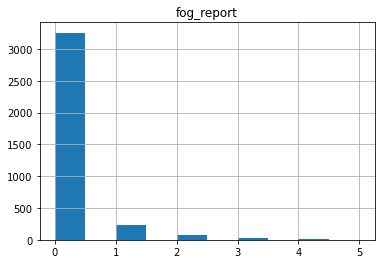

In [5]:
df.hist(column='fog_report')

In [6]:
df['fog_report'].value_counts()

0    3254
1     235
2      71
3      22
4       7
5       2
Name: fog_report, dtype: int64

In [7]:
#What is the proportion?
df['fog_report'].value_counts()/df['fog_report'].count()

0    0.906154
1    0.065441
2    0.019772
3    0.006126
4    0.001949
5    0.000557
Name: fog_report, dtype: float64

In [8]:
#Let's generate a dummy taking the value 1 if at least one fog report happened during the week "t"
df['fog_bin'] = (df['fog_report']>0).astype(int)

In [9]:
df['fog_bin'].describe()

count    3591.000000
mean        0.093846
std         0.291655
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fog_bin, dtype: float64

Text(0.5, 1.0, 'Seasonality')

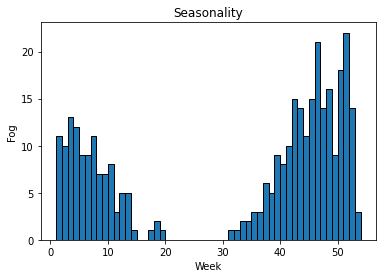

In [10]:
#Seasonality
fog_tt=df.groupby(['week'])['fog_bin'].agg(['sum'])
fog_tt.reset_index(inplace=True)
fig, ax = plt.subplots()
ax.bar(fog_tt['week'], fog_tt['sum'], width=1, ec="k", align="edge")
plt.xlabel('Week')
plt.ylabel('Fog')
plt.title('Seasonality')

**Note:** Strong seasonality (fog comes with colder weather). It will be important to capture this effect to avoid OVB (cold weather affects health and fog).

Text(0.5, 1.0, 'Time trend')

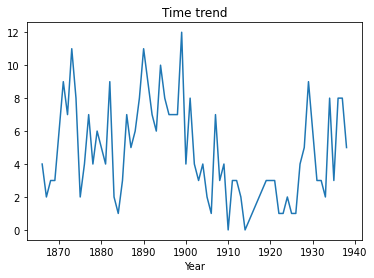

In [11]:
#Time trend
fog_tt2=df.groupby(['year'])['fog_bin'].agg(['sum'])
fog_tt2.reset_index(inplace=True)
fig, ax = plt.subplots()
ax.plot(fog_tt2['year'], fog_tt2['sum'])
plt.xlabel('Year')
plt.title('Time trend')

Text(0.5, 1.0, 'Time trend')

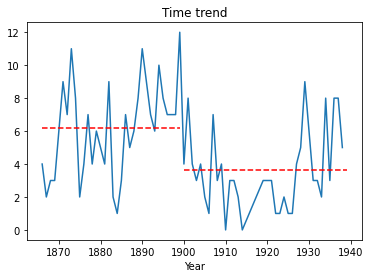

In [12]:
#Time trend
fog_tty=df.groupby(['year'])['fog_bin'].agg(['sum'])
fog_tty.reset_index(inplace=True)
fig, ax = plt.subplots()
ax.plot(fog_tty['year'], fog_tty['sum'])

plt.hlines(y = fog_tty[fog_tt2['year']<1900]['sum'].mean(), xmin = 1866, xmax = 1899, color = 'r', linestyle = 'dashed')   
plt.hlines(y = fog_tty[fog_tt2['year']>=1900]['sum'].mean(), xmin = 1900, xmax = 1939,  color = 'r', linestyle = 'dashed')   
plt.xlabel('Year')
plt.title('Time trend')

**Note:** Fewer fog events in the 20th century. Hence controlling for the year or decade is important (OVB: medicine evolves through time as well as sanitary conditions). 

### 3.2 Total deaths

In [13]:
df['totaldeaths'].describe()

count    3591.000000
mean     1362.840713
std       366.683279
min       640.000000
25%      1124.000000
50%      1375.000000
75%      1576.500000
max      3761.000000
Name: totaldeaths, dtype: float64

<AxesSubplot:>

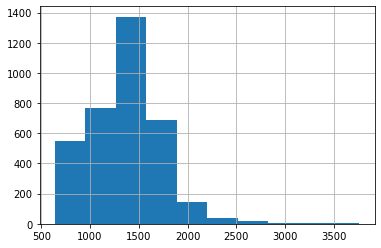

In [14]:
df['totaldeaths'].hist()

Text(0.5, 1.0, 'Seasonality')

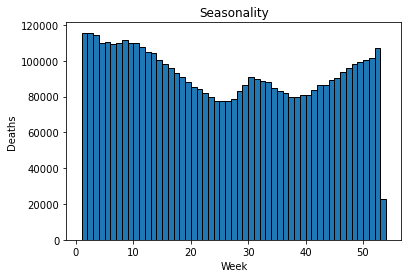

In [50]:
#seasonality
totaldeaths_tt=df.groupby(['week'])['totaldeaths'].agg(['sum'])
totaldeaths_tt.reset_index(inplace=True)
fig, ax = plt.subplots()
ax.bar(totaldeaths_tt['week'], totaldeaths_tt['sum'], width=1, ec="k",  align="edge")
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.title('Seasonality')

**Note:** Curious bump between weeks 30 and 35. As expected, seasonality similar to the fog variable. 

Text(0.5, 1.0, 'Seasonality')

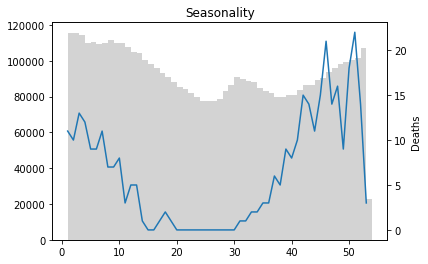

In [38]:
#seasonality of fog and death
totaldeaths_tt=df.groupby(['week'])['totaldeaths'].agg(['sum'])
totaldeaths_tt.reset_index(inplace=True)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(totaldeaths_tt['week'], totaldeaths_tt['sum'], width=1, color='lightgray',  align="edge")
ax2.plot(fog_tt['week'], fog_tt['sum'])
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.title('Seasonality')

Text(0.5, 1.0, 'Seasonality')

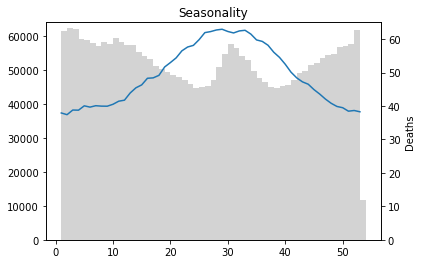

In [66]:
#seasonality and temp before 1900
temp_tt=df.loc[df['year']<1900].groupby(['week'])['temperature'].agg(['mean'])
temp_tt.reset_index(inplace=True)
totaldeaths_tt=df.loc[df['year']<1900].groupby(['week'])['totaldeaths'].agg(['sum'])
totaldeaths_tt.reset_index(inplace=True)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(totaldeaths_tt['week'], totaldeaths_tt['sum'], width=1, color='lightgray',  align="edge")
ax2.plot(temp_tt['week'], temp_tt['mean'])
ax1.set_ylim([0, 64000])
ax2.set_ylim([0, 65])
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.title('Seasonality')

Text(0.5, 1.0, 'Seasonality')

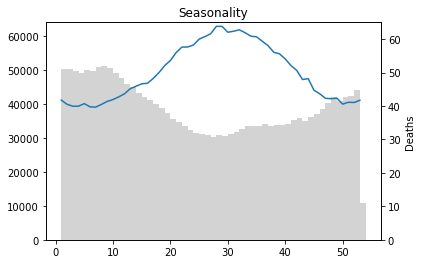

In [65]:
#seasonality and temp after 1900
temp_tt=df.loc[df['year']>1900].groupby(['week'])['temperature'].agg(['mean'])
temp_tt.reset_index(inplace=True)
totaldeaths_tt=df.loc[df['year']>1900].groupby(['week'])['totaldeaths'].agg(['sum'])
totaldeaths_tt.reset_index(inplace=True)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(totaldeaths_tt['week'], totaldeaths_tt['sum'], width=1, color='lightgray',  align="edge")
ax2.plot(temp_tt['week'], temp_tt['mean'])
ax1.set_ylim([0, 64000])
ax2.set_ylim([0, 65])
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.title('Seasonality')

Text(0.5, 1.0, 'Time trend')

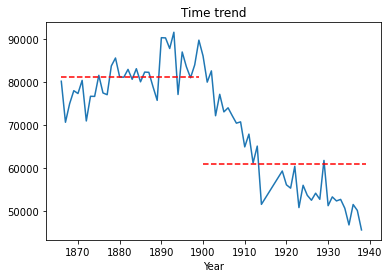

In [17]:
#Time trend
totaldeaths_s=df.groupby(['year'])['totaldeaths'].agg(['sum'])
totaldeaths_s.reset_index(inplace=True)
fig, ax = plt.subplots()
ax.plot(totaldeaths_s['year'],totaldeaths_s['sum'])

plt.hlines(y = totaldeaths_s[totaldeaths_s['year']<1900]['sum'].mean(),
           xmin = 1866, xmax = 1899, color = 'r', linestyle = 'dashed') 

plt.hlines(y = totaldeaths_s[totaldeaths_s['year']>=1900]['sum'].mean(),
           xmin = 1900, xmax = 1939,  color = 'r', linestyle = 'dashed')   
plt.xlabel('Year')
plt.title('Time trend')

**Note:** Again, as expected, we witness an important reduction in the number of deaths in the 20th century. It seems that there is no data during WWI!

In [18]:
df[(df['year']>1900) & (df['year']<1925)]['year'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1919, 1920, 1921, 1922, 1923, 1924], dtype=int16)

**Note:** Show the missing data on line graphs!

## 4. Bivariate analysis:
### 4.1 Pollution and fog
We can test the rationale with the data on pollution from 1951 to 1962 (direct measures of pollution are only available for this period).

In [19]:
df_full = pd.read_stata("./combined_fog_data.dta")
#Dummy taking the value 1 if at least one fog report happened during the week
df_full['fog_bin'] = (df_full['fog_report']>0).astype(int)

#Gen week on impact and before/after
df_full['fog_week'] = np.nan
df_full.loc[df_full['fog_bin']==1,'fog_week'] = 0
df_full

,date,year,week,births,totaldeaths,lightfog,fog_report,temperature,prematurebirth,pressure,...,rainfall,stillbirths,pollution_max,pollution_min,pollution_mean,month,decade,temp_sq,fog_bin,fog_week
0,1866-01-01,1866,1,2252,1520,NaN,0,43.200001,NaN,29.684999,...,0.520000,NaN,NaN,NaN,NaN,1,1.0,1866.240112,0,NaN
1,1866-01-08,1866,2,1928,1506,NaN,0,36.900002,NaN,29.195000,...,2.410000,NaN,NaN,NaN,NaN,1,1.0,1361.610107,0,NaN
2,1866-01-15,1866,3,2246,1569,NaN,0,46.900002,NaN,29.740000,...,0.620000,NaN,NaN,NaN,NaN,1,1.0,2199.610107,0,NaN
3,1866-01-22,1866,4,2149,1363,1.0,0,43.099998,NaN,30.138000,...,0.230000,NaN,NaN,NaN,NaN,1,1.0,1857.609863,0,NaN
4,1866-01-29,1866,5,2171,1417,NaN,0,45.099998,NaN,29.552999,...,0.680000,NaN,NaN,NaN,NaN,2,1.0,2034.009888,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,1965-11-26,1965,48,1314,870,1.0,1,40.900002,NaN,29.228203,...,1.200788,14.0,NaN,NaN,0.055,12,10.0,1672.810181,1,0.0
4526,1965-12-03,1965,49,1295,903,NaN,0,42.799999,NaN,29.355181,...,0.992127,18.0,NaN,NaN,0.044,12,10.0,1831.839966,0,NaN
4527,1965-12-10,1965,50,1339,923,3.0,1,47.700001,NaN,29.662294,...,0.964567,24.0,NaN,NaN,0.410,12,10.0,2275.290039,1,0.0
4528,1965-12-17,1965,51,978,780,1.0,1,43.200001,NaN,29.464443,...,0.649607,22.0,NaN,NaN,0.650,12,10.0,1866.240112,1,0.0


In [20]:
for i in range(1,6):
 df_full.loc[(df_full['fog_week'].shift(i)==0) & (df_full['fog_week'].isna()),'fog_week'] = i
 df_full.loc[(df_full['fog_week'].shift(-i)==0) & (df_full['fog_week'].isna()),'fog_week'] = -i

C:\Users\qgallea\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


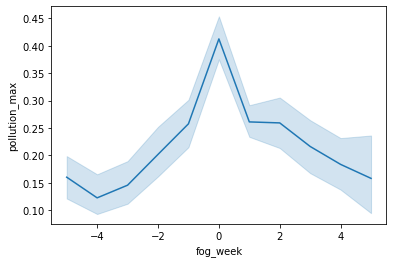

In [21]:
ax = sns.lineplot(df_full['fog_week'], df_full['pollution_max'])

**Note** Clear pollution shock during the week with fog. Pollution levels remain higher in the following (stat-sig for three weeks at least).

### 4.2 Total deaths and 

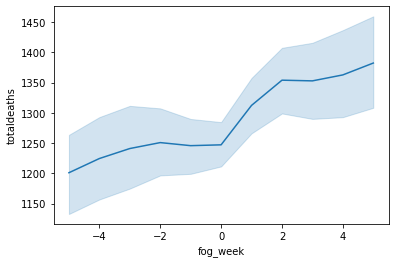

In [67]:
ax = sns.lineplot(x=df_full['fog_week'], y=df_full['totaldeaths'])

**Note:** There is a shock one week after the pollution shock. However, there is a positive trend starting before. Remember that this simple bivariate analysis suffers from omitted variable bias (e.g. seasonality and time trend).

## 5 Multivariate analysis

Now let's progressively try to get closer to a causal effect. 

### 5.1 Capturing seasonality

In [68]:
#Gen week on impact and before/after
df['fog_week'] = np.nan
df.loc[df['fog_bin']==1,'fog_week'] = 0

fog_w_set = list()

for i in range(-5, 0):
    df.loc[(df['fog_week'].shift(i)==0) & (df['fog_week'].isna()),'fog_week'] = i
    col_name =  "fog_b"+str(i*-1)
    df[col_name] = (df['fog_week']==i).astype(int)
    fog_w_set.append(col_name)
    
for i in range(0, 6):
    df.loc[(df['fog_week'].shift(i)==0) & (df['fog_week'].isna()),'fog_week'] = i
    col_name =  "fog_a"+str(i)
    df[col_name] = (df['fog_week']==i).astype(int)
    fog_w_set.append(col_name)
    
#Week FE
w_set = list()
for i in range(1, 53):
    col_name =  "week"+str(i)
    df[col_name] = (df['week']==i).astype(int)
    w_set.append(col_name)
    
#Year FE
y_set = list()
for i in range(1866, 1939):
    col_name =  "year"+str(i)
    df[col_name] = (df['year']==i).astype(int)
    y_set.append(col_name)
df

,date,year,week,births,totaldeaths,lightfog,fog_report,temperature,prematurebirth,pressure,...,year1929,year1930,year1931,year1932,year1933,year1934,year1935,year1936,year1937,year1938
0,1866-01-01,1866,1,2252,1520,NaN,0,43.200001,NaN,29.684999,...,0,0,0,0,0,0,0,0,0,0
1,1866-01-08,1866,2,1928,1506,NaN,0,36.900002,NaN,29.195000,...,0,0,0,0,0,0,0,0,0,0
2,1866-01-15,1866,3,2246,1569,NaN,0,46.900002,NaN,29.740000,...,0,0,0,0,0,0,0,0,0,0
3,1866-01-22,1866,4,2149,1363,1.0,0,43.099998,NaN,30.138000,...,0,0,0,0,0,0,0,0,0,0
4,1866-01-29,1866,5,2171,1417,NaN,0,45.099998,NaN,29.552999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,1938-11-26,1938,48,1146,878,2.0,0,43.200001,NaN,29.499001,...,0,0,0,0,0,0,0,0,0,1
3587,1938-12-03,1938,49,1101,852,NaN,0,45.799999,NaN,29.511999,...,0,0,0,0,0,0,0,0,0,1
3588,1938-12-10,1938,50,1183,921,2.0,2,46.299999,NaN,29.708000,...,0,0,0,0,0,0,0,0,0,1
3589,1938-12-17,1938,51,799,1000,1.0,0,27.799999,NaN,29.780001,...,0,0,0,0,0,0,0,0,0,1


In [24]:
w_col = [col for col in df if col.startswith('w')]
y_col = [col for col in df if col.startswith('y')]
col_names=['totaldeaths','pressure','humidity','rainfall','temperature','fog_b5','fog_b4','fog_b3','fog_b2','fog_b1','fog_a0',
 'fog_a1','fog_a2', 'fog_a3', 'fog_a4', 'fog_a5']
col_names.extend(w_col)
col_names.extend(y_col)
df_nona = df[np.intersect1d(df.columns, col_names)]

df_nona.dropna()

,fog_a0,fog_a1,fog_a2,fog_a3,fog_a4,fog_a5,fog_b1,fog_b2,fog_b3,fog_b4,...,year1929,year1930,year1931,year1932,year1933,year1934,year1935,year1936,year1937,year1938
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3587,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3588,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3589,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
##Compute the regression and prepare to produce a forest plot
#reg1 predicts deaths only wiht the week before after fog events

eq = 'totaldeaths ~'+  '+'.join(fog_w_set)
reg1 = smf.ols(eq, data=df_nona).fit()
#compute the CI
ci1 = reg1.params - reg1.conf_int()[1]

#reg2 predicts deaths only wiht the week before after fog events while controlling for seasonality (week fixed effects)

controls = '+'.join(fog_w_set)
controls = controls +'+'
controls = controls + '+'.join(w_set)
controls
eq = 'totaldeaths ~'+  controls  
reg2 = smf.ols(eq, data=df_nona).fit()
#compute the CI
ci2 = reg2.params - reg2.conf_int()[1]


coef_df = pd.DataFrame()
for i, mod in enumerate([reg1,reg2]):
    err_series = mod.params - mod.conf_int()[1]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
                                           'err': err_series.values,
                                           'varname': err_series.index.values,
                                           'model': 'model %d'%(i+1)
                                          })
                            )
#keeping the coef of interest (fog)
coef_df = coef_df[coef_df['varname'].str.startswith('fog_')] 
coef_df

C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\3233532843.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\3233532843.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,


,coef,err,varname,model
1,116.291959,-44.581699,fog_b5,model 1
2,142.278777,-50.901157,fog_b4,model 1
3,185.056747,-55.754297,fog_b3,model 1
4,209.676287,-61.055452,fog_b2,model 1
5,186.058883,-66.418627,fog_b1,model 1
6,272.569772,-40.388335,fog_a0,model 1
7,313.687985,-66.700441,fog_a1,model 1
8,263.723764,-68.476593,fog_a2,model 1
9,268.418526,-70.079466,fog_a3,model 1
10,265.415339,-73.296596,fog_a4,model 1


C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\2935052487.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\2935052487.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])


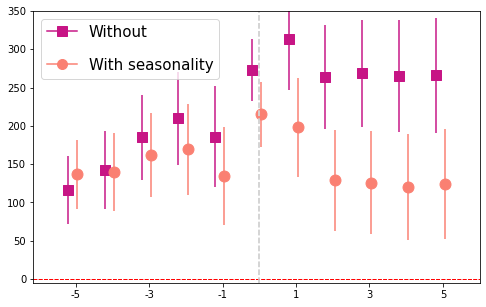

In [78]:
## marker to use
marker_list = 'so'
marker_c_list= ['mediumvioletred', 'salmon']
width=0.25
## 11 covariates in total
base_x = np.arange(11) - 0.2
base_x

fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x positions
    X = base_x + width*i
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'],  ecolor=marker_c_list[i])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color=marker_c_list[i])
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
    ax.vlines(5, ymin = -5 , ymax = 350, colors='lightgray', linestyles='dashed')
   # fs = 16
    
    
model_name=['Without','With seasonality']
plt.ylim([-5, 350])
## finally, build customized legend
legend_elements = [Line2D([0], [0], marker=m,
                          label=model_name[i],
                          color = marker_c_list[i],
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

**Note:** We can see how capturing the seasonality makes the trend go back to the pre-shock level after two weeks. Now let's include as well the year as to capture the evolution through time (e.g. sanitary conditions, knowledge in medicine, climate change).

### 5.2 Capturing year fixed effects

In [27]:
##Compute the regression and prepare to produce a forest plot

#reg1 without year FE
controls = '+'.join(fog_w_set)
controls = controls +'+'
controls = controls + '+'.join(w_set)
controls
eq = 'totaldeaths ~'+  controls  
reg1 = smf.ols(eq, data=df_nona).fit()
#compute the CI
ci1 = reg1.params - reg1.conf_int()[1]



#reg2 with year FE
controls = '+'.join(fog_w_set)
controls = controls +'+'
controls = controls + '+'.join(w_set)
controls = controls +'+'
controls = controls + '+'.join(y_set)
eq = 'totaldeaths ~'+  controls  
reg2 = smf.ols(eq, data=df_nona).fit()
#compute the CI
ci2 = reg2.params - reg2.conf_int()[1]


coef_df = pd.DataFrame()
for i, mod in enumerate([reg1,reg2]):
    err_series = mod.params - mod.conf_int()[1]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
                                           'err': err_series.values,
                                           'varname': err_series.index.values,
                                           'model': 'model %d'%(i+1)
                                          })
                            )
#keeping the coef of interest (fog)
coef_df = coef_df[coef_df['varname'].str.startswith('fog_')] 
coef_df

C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\1250566071.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\1250566071.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,


,coef,err,varname,model
1,136.557412,-45.302411,fog_b5,model 1
2,139.394701,-50.739234,fog_b4,model 1
3,162.258660,-54.726116,fog_b3,model 1
4,169.481893,-59.360897,fog_b2,model 1
5,134.481606,-64.082846,fog_b1,model 1
6,215.144937,-42.745373,fog_a0,model 1
7,197.839620,-64.399521,fog_a1,model 1
8,128.907849,-65.757174,fog_a2,model 1
9,125.802716,-66.975053,fog_a3,model 1
10,120.313925,-69.645226,fog_a4,model 1


C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\3818261068.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\3818261068.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])


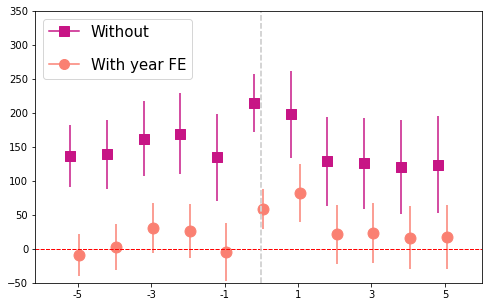

In [28]:
## marker to use
marker_list = 'so'
marker_c_list= ['mediumvioletred', 'salmon']
width=0.25


fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x positions
    X = base_x + width*i
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'],  ecolor=marker_c_list[i])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color=marker_c_list[i])
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
    ax.vlines(5, ymin = -50 , ymax = 350, colors='lightgray', linestyles='dashed')
   # fs = 16
    
    
model_name=['Without','With year FE']
plt.ylim([-50, 350])
## finally, build customized legend
legend_elements = [Line2D([0], [0], marker=m,
                          label=model_name[i],
                          color = marker_c_list[i],
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

**Note:** The model is now clearly better calibrated. Only the coefficient on impact and one week after are statistically significant. Before it was biased by the higher number of fog events during the 19th century along the worse health conditions.

### 5.3 Controlling for weather conditions
Weather conditions might be related to pollution/fog and death rate. Hence, the model would suffer from an omitted variable bias if we do not control for those. 

In [80]:
##Compute the regression and prepare to produce a forest plot

#reg1 without weather controls
controls = '+'.join(fog_w_set)
controls = controls +'+'
controls = controls + '+'.join(w_set)
controls = controls +'+'
controls = controls + '+'.join(y_set)
eq = 'totaldeaths ~'+  controls   
reg1 = smf.ols(eq, data=df_nona).fit()
#compute the CI
ci1 = reg1.params - reg1.conf_int()[1]


#reg1 with weather controls
controls = controls+'+pressure+humidity+rainfall+temperature'
eq = 'totaldeaths ~'+  controls  
reg2 = smf.ols(eq, data=df_nona).fit()
#compute the CI
ci2 = reg2.params - reg2.conf_int()[1]


coef_df = pd.DataFrame()
for i, mod in enumerate([reg1,reg2]):
    err_series = mod.params - mod.conf_int()[1]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
                                           'err': err_series.values,
                                           'varname': err_series.index.values,
                                           'model': 'model %d'%(i+1)
                                          })
                            )
#keeping the coef of interest (fog)
coef_df = coef_df[coef_df['varname'].str.startswith('fog_')] 
coef_df

C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\1261673822.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\1261673822.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,


,coef,err,varname,model
1,-8.982246,-31.120897,fog_b5,model 1
2,2.433755,-34.203230,fog_b4,model 1
3,30.349231,-36.854059,fog_b3,model 1
4,26.627840,-39.825283,fog_b2,model 1
5,-4.236800,-42.643196,fog_b1,model 1
6,58.683630,-29.806463,fog_a0,model 1
7,81.573913,-42.804391,fog_a1,model 1
8,21.226526,-43.577840,fog_a2,model 1
9,23.413621,-44.269043,fog_a3,model 1
10,16.616293,-45.871141,fog_a4,model 1


C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\3595179390.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\3595179390.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])


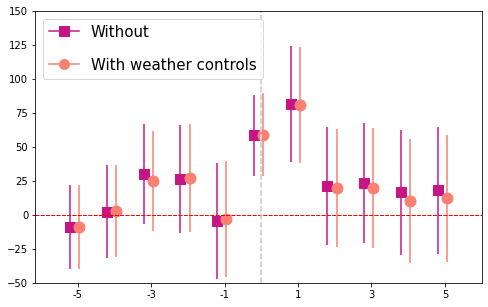

In [81]:
## marker to use
marker_list = 'so'
marker_c_list= ['mediumvioletred', 'salmon']
width=0.25


fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x positions
    X = base_x + width*i
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'],  ecolor=marker_c_list[i])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color=marker_c_list[i])
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
    ax.vlines(5, ymin = -50 , ymax = 350, colors='lightgray', linestyles='dashed')
   # fs = 16
    
    
model_name=['Without','With weather controls']
plt.ylim([-50, 150])
## finally, build customized legend
legend_elements = [Line2D([0], [0], marker=m,
                          label=model_name[i],
                          color = marker_c_list[i],
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

**Note:** Weather controls have almost no effect. This is very reassuring. 

### 5.4 Death cause
What if fog affects mortality through other channels than pollution? *One potential channel is **accidents or crime**, which may have been more likely on **foggy days**. I will assess this channel directly by separating deaths due to accidents or homicide from deaths due to other causes. Another potential channel is that fog may have made it **harder for people to reach** the hospital or for doctors to reach their patients, though during much of the study period medical care was rudimentary and often counterproductive"* 
How would you test for this? Split by different types of deaths.

In [82]:
df_cause = pd.read_stata("./prepared_by_cause_data.dta")
df_cause['category'].unique()

array(['ACCIDENT_VIOLENCE', 'ALCOHOLISM', 'ALL_CAUSES', 'BRONCHITIS',
       'CANCER', 'CARDIOVASCULAR', 'CHILDBIRTH', 'DIGESTIVE', 'EXECUTION',
       'HOMICIDE', 'MEASLES', 'NEUROLOGICAL', 'OLD_AGE',
       'OTHER_INFECTIOUS', 'OTHER_MISC_COD', 'PNEUMONIA',
       'PREMATURE_BIRTH', 'RESPIRATORY', 'SCARLET_FEVER', 'SMALLPOX',
       'SUICIDE', 'TUBERCULOSIS', 'VENEREAL_DISEASES', 'WHOOPING_COUGH'],
      dtype=object)

In [32]:
## gen a two sub dataframes for accident violence and bronchitis
df_a = df_cause[df_cause['category']=='ACCIDENT_VIOLENCE']
df_a = df_a[['age_all', 'week', 'year']]
df_a = pd.merge(df_a, df, on=['year', 'week'])

df_b = df_cause[df_cause['category']=='BRONCHITIS']
df_b = df_b[['age_all', 'week', 'year']]
df_b = pd.merge(df_b, df, on=['year', 'week'])


##Reg 1 for all accident and vilolent deaths
controls = '+'.join(fog_w_set)
controls = controls +'+'
controls = controls + '+'.join(w_set)
controls = controls +'+'
controls = controls + '+'.join(y_set) 
controls = controls+'+pressure+humidity+rainfall+temperature'
eq = 'age_all ~'+  controls  
reg1 = smf.ols(eq, data=df_a).fit()
#compute the CI
ci1 = reg1.params - reg1.conf_int()[1]

##Reg 2 for bronchitis
reg2 = smf.ols(eq, data=df_b).fit()
#compute the CI
ci2 = reg2.params - reg2.conf_int()[1]


coef_df = pd.DataFrame()
for i, mod in enumerate([reg1,reg2]):
    err_series = mod.params - mod.conf_int()[1]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
                                           'err': err_series.values,
                                           'varname': err_series.index.values,
                                           'model': 'model %d'%(i+1)
                                          })
                            )
#keeping the coef of interest (fog)
coef_df = coef_df[coef_df['varname'].str.startswith('fog_')] 
coef_df

C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\2052429461.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\2052429461.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,


,coef,err,varname,model
1,-0.976370,-1.639172,fog_b5,model 1
2,0.012251,-1.808848,fog_b4,model 1
3,2.945029,-1.965239,fog_b3,model 1
4,0.295305,-2.134083,fog_b2,model 1
5,1.297650,-2.283988,fog_b1,model 1
6,0.356270,-1.620084,fog_a0,model 1
7,2.008530,-2.259091,fog_a1,model 1
8,-1.344189,-2.295086,fog_a2,model 1
9,-0.999264,-2.334643,fog_a3,model 1
10,0.043593,-2.423281,fog_a4,model 1


C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\1389988615.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\1389988615.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])


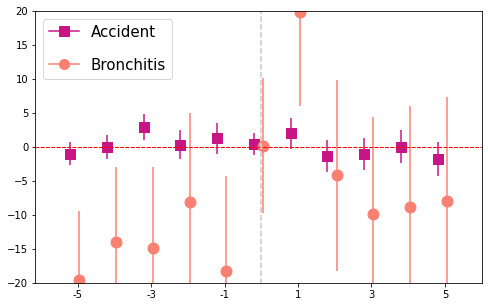

In [33]:
## marker to use
marker_list = 'so'
marker_c_list= ['mediumvioletred', 'salmon']
width=0.25


fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x positions
    X = base_x + width*i
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'],  ecolor=marker_c_list[i])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color=marker_c_list[i])
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
    ax.vlines(5, ymin = -50 , ymax = 350, colors='lightgray', linestyles='dashed')
   # fs = 16
    
    
model_name=['Accident','Bronchitis']
plt.ylim([-20, 20])
## finally, build customized legend
legend_elements = [Line2D([0], [0], marker=m,
                          label=model_name[i],
                          color = marker_c_list[i],
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

### 5.5 Is it pollution or staying inside, and disrupting transportation (doctors/hospitals)?
What if fog affects mortality through other channels than pollution? *Heavy rainfall is similar to fog in several ways: it is damp, causes people to stay indoors, and can disrupt transportation. However, unlike fog, rain is known to reduce pollution levels by washing" particulates and other pollutants from the air. Thus, rainfall provides a useful check on the fog results. If the mortality effects of fog are being driven by factors like people staying indoors, increased moisture in the air, or transportation disruptions, then the effects for fog should look similar to those obtained for heavy rain."* 
How would you test for this? Study heavy rainfall shock!

In [34]:
#Let's take the top 10% week with highest rainfall
df_nona_rain = df_nona.copy()
p90 = df_nona_rain['rainfall'] > df_nona_rain['rainfall'].quantile(0.90)
df_nona_rain['rain_p90'] = p90
result = df_nona_rain['rain_p90'].astype(int)
df_nona_rain['rain_bin'] = result

#Compute the distance to heavy rainfall
df_nona_rain['rain_week'] = np.nan
df_nona_rain.loc[df_nona_rain['rain_bin']==1,'rain_week'] = 0

rain_w_set = list()

for i in range(-5, 0):
    df_nona_rain.loc[(df_nona_rain['rain_week'].shift(i)==0) & (df_nona_rain['rain_week'].isna()),'rain_week'] = i
    col_name =  "rain_b"+str(i*-1)
    df_nona_rain[col_name] = (df_nona_rain['rain_week']==i).astype(int)
    rain_w_set.append(col_name)
    
for i in range(0, 6):
    df_nona_rain.loc[(df_nona_rain['rain_week'].shift(i)==0) & (df_nona_rain['rain_week'].isna()),'rain_week'] = i
    col_name =  "rain_a"+str(i)
    df_nona_rain[col_name] = (df_nona_rain['rain_week']==i).astype(int)
    rain_w_set.append(col_name)
    

In [35]:
##In order to align the two set of coefficients, let's create a copy of the df where the fog_ variables are
## replaced by the rain_variables. 
df_nona_rain.drop(columns = fog_w_set, inplace=True)
for i in range(-5, 0):
    fog_name =  "fog_b"+str(i*-1)
    rain_name =  "rain_b"+str(i*-1)
    df_nona_rain.rename(columns={rain_name: fog_name}, inplace=True)
    
for i in range(0, 6):
    fog_name =  "fog_a"+str(i*1)
    rain_name =  "rain_a"+str(i*1)
    df_nona_rain.rename(columns={rain_name: fog_name}, inplace=True)
    
for col in df_nona_rain.columns:
    print(col)

humidity
pressure
rainfall
temperature
totaldeaths
week
week1
week10
week11
week12
week13
week14
week15
week16
week17
week18
week19
week2
week20
week21
week22
week23
week24
week25
week26
week27
week28
week29
week3
week30
week31
week32
week33
week34
week35
week36
week37
week38
week39
week4
week40
week41
week42
week43
week44
week45
week46
week47
week48
week49
week5
week50
week51
week52
week6
week7
week8
week9
year
year1866
year1867
year1868
year1869
year1870
year1871
year1872
year1873
year1874
year1875
year1876
year1877
year1878
year1879
year1880
year1881
year1882
year1883
year1884
year1885
year1886
year1887
year1888
year1889
year1890
year1891
year1892
year1893
year1894
year1895
year1896
year1897
year1898
year1899
year1900
year1901
year1902
year1903
year1904
year1905
year1906
year1907
year1908
year1909
year1910
year1911
year1912
year1913
year1914
year1915
year1916
year1917
year1918
year1919
year1920
year1921
year1922
year1923
year1924
year1925
year1926
year1927
year1928
year1929
year1930

In [36]:
##Compute the regression and prepare to produce a forest plot
controls = '+'.join(fog_w_set)
controls = controls +'+'
controls = controls + '+'.join(w_set)
controls = controls +'+'
controls = controls + '+'.join(y_set) 
controls = controls+'+pressure+humidity+rainfall+temperature'
eq = 'totaldeaths ~'+  controls 
reg1 = smf.ols(eq, data=df_nona).fit()
#compute the CI
ci1 = reg1.params - reg1.conf_int()[1]

controls = '+'.join(fog_w_set)
controls = controls +'+'
controls = controls + '+'.join(w_set)
controls = controls +'+'
controls = controls + '+'.join(y_set) 
controls = controls+'+pressure+humidity+temperature'
eq = 'totaldeaths ~'+  controls 
reg2 = smf.ols(eq, data=df_nona_rain).fit()
#compute the CI
ci2 = reg2.params - reg2.conf_int()[1]


coef_df = pd.DataFrame()
for i, mod in enumerate([reg1,reg2]):
    err_series = mod.params - mod.conf_int()[1]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
                                           'err': err_series.values,
                                           'varname': err_series.index.values,
                                           'model': 'model %d'%(i+1)
                                          })
                            )
#keeping the coef of interest (fog)
coef_df = coef_df[coef_df['varname'].str.startswith('fog_') | coef_df['varname'].str.startswith('rain_')] 
coef_df

C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\1533070456.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\1533070456.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values,


,coef,err,varname,model
1,-9.204317,-30.991959,fog_b5,model 1
2,2.881250,-34.049734,fog_b4,model 1
3,24.861506,-36.713433,fog_b3,model 1
4,26.855295,-39.634770,fog_b2,model 1
5,-2.949269,-42.460747,fog_b1,model 1
6,59.027024,-30.545855,fog_a0,model 1
7,81.048989,-42.600905,fog_a1,model 1
8,20.031180,-43.370240,fog_a2,model 1
9,19.470324,-44.078382,fog_a3,model 1
10,10.476066,-45.704611,fog_a4,model 1


C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\2232004917.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
C:\Users\qgallea\AppData\Local\Temp\ipykernel_24124\2232004917.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])


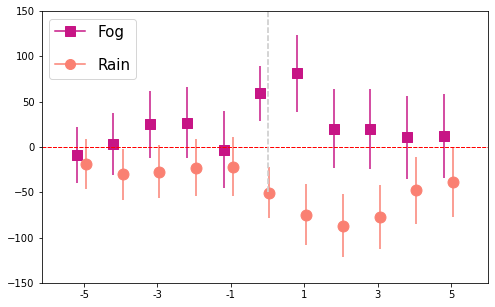

In [37]:
## marker to use
marker_list = 'so'
marker_c_list= ['mediumvioletred', 'salmon']
width=0.25
## 11 covariates in total
base_x = np.arange(11) - 0.2
base_x


fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x positions
    X = base_x + width*i
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'],  ecolor=marker_c_list[i])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color=marker_c_list[i])
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    ax.set_xticklabels(['', '-5', '-3', '-1', '1', '3', '5'])
    ax.vlines(5, ymin = -50 , ymax = 350, colors='lightgray', linestyles='dashed')
   # fs = 16
    
    
model_name=['Fog','Rain']
plt.ylim([-150, 150])
## finally, build customized legend
legend_elements = [Line2D([0], [0], marker=m,
                          label=model_name[i],
                          color = marker_c_list[i],
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

**Note:** Fascinating result! Indeed heavy rainfall has a similar effect of keeping people home and making it harder to travel, but the effect is the opposite! So it is a story of pollution, as on one side fog traps pollution, and on the other rain cleans the air!